### 特征在不同的维度，会影响运算结果，在运算之前需要先标准化

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target



In [3]:
X = X[y < 2, :2]
y = y[y<2]

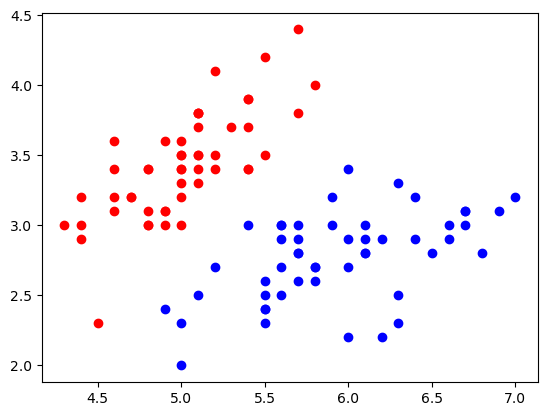

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard =  standardScaler.transform(X)


In [14]:
def plot_decision_boundary(model, axis):
  x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
  )
  X_new = np.c_[x0.ravel(), x1.ravel()]
  
  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)
  
  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
  
  plt.contourf(x0, x1, zz, cmap=custom_cmap)
  

In [15]:
from sklearn.svm import LinearSVC 

svc = LinearSVC(C = 1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0)

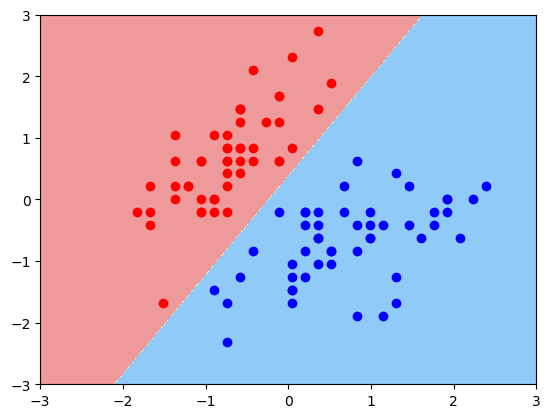

In [16]:

plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

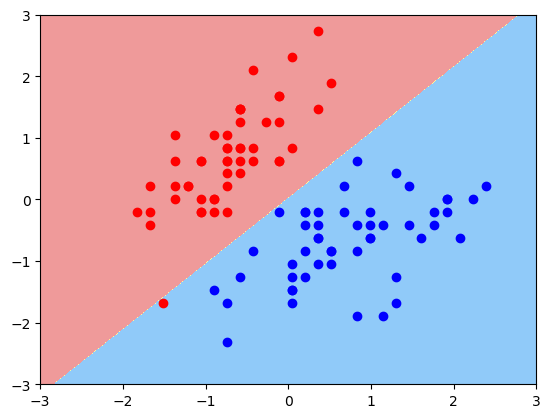

In [17]:
svc = LinearSVC(C = 0.01)
svc.fit(X_standard, y)
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

In [18]:
svc.coef_

array([[ 0.43789729, -0.41091882]])

In [19]:
svc.intercept_

array([0.00592623])

In [24]:
def plot_svc_decision_boundary(model, axis):
  x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
  )
  X_new = np.c_[x0.ravel(), x1.ravel()]
  
  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)
  
  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
  
  plt.contourf(x0, x1, zz, cmap=custom_cmap)
  
  w = model.coef_[0]
  b = model.intercept_[0]
  
  # w0 * x0 + w1 * x1 + b = 0
  # => x1 = -b/w1 - w0/w1 * x0
  plot_x = np.linspace(axis[0], axis[1], 200)
  up_y = - w[0] / w[1] * plot_x - b / w[1] + 1/w[1]
  down_y = - w[0] / w[1] * plot_x - b / w[1] - 1/w[1]
  
  up_index = (up_y >= axis[2]) & (up_y <= axis[3])
  down_index = (down_y >= axis[2]) & (down_y <= axis[3])
  
  plt.plot(plot_x[up_index], up_y[up_index], color='black')
  plt.plot(plot_x[down_index], down_y[down_index], color='black')

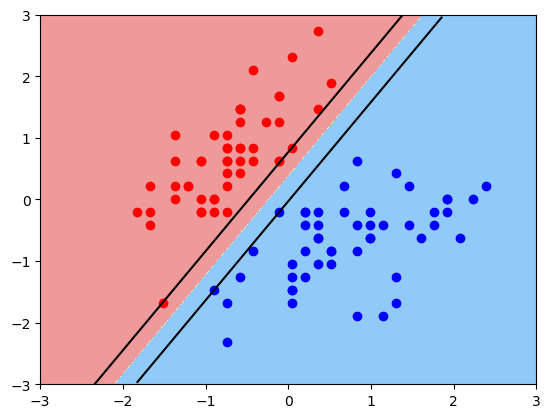

In [25]:
svc = LinearSVC(C = 1e9)
svc.fit(X_standard, y)
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

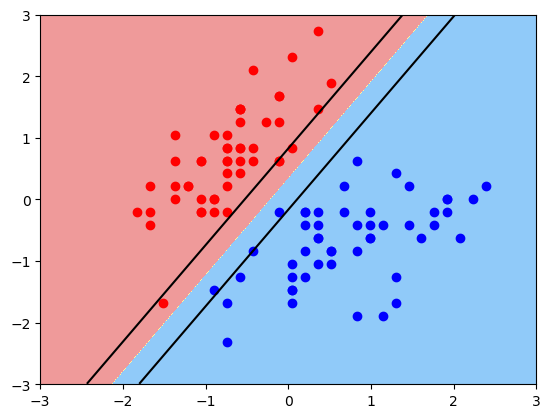

In [30]:
svc = LinearSVC(C = 10)
svc.fit(X_standard, y)
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()